In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # for linear regression 
from sklearn.metrics import mean_squared_error # for rmse which is our loss function


In [5]:
df= pd.read_csv('D:/Training Project/supply_chain_data.csv')

In [6]:
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929462


In [7]:
df.tail(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
90,skincare,SKU90,13.881913,56,320,9592.633570,Non-binary,66,18,96,...,Bangalore,8,585,8,85.675963,Pass,1.219382,Rail,Route B,990.078472
91,cosmetics,SKU91,62.111965,90,916,1935.206794,Male,98,22,85,...,Delhi,5,207,28,39.772883,Pending,0.626002,Rail,Route B,996.778315
92,cosmetics,SKU92,47.714233,44,276,2100.129755,Male,90,25,10,...,Mumbai,4,671,29,62.612690,Pass,0.333432,Rail,Route B,230.092782
93,haircare,SKU93,69.290831,88,114,4531.402134,Unknown,63,17,66,...,Chennai,21,824,20,35.633652,Fail,4.165782,Air,Route A,823.523846
94,cosmetics,SKU94,3.037689,97,987,7888.356547,Unknown,77,26,72,...,Delhi,12,908,14,60.387379,Pass,1.463607,Rail,Route B,846.665257
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [8]:
df.shape

(100, 24)

In [9]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [11]:
print("Missing Values:\n")
df.isnull().sum()
 #checking for null values

Missing Values:



Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [12]:
# print("Duplicate Rows:")
#df.duplicated().sum()
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [13]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [14]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [15]:
# إزالة المسافات الزائدة وتحويل النصوص إلى Lowercase
df["Supplier name"] = df["Supplier name"].str.strip().str.lower()
df["Product type"] = df["Product type"].str.strip().str.lower()
#str.strip () removes leading and trailing whitespace, str.lower() converts to lowercase

df.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [16]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

C:\Users\ICARUS\AppData\Local\Temp\ipykernel_4012\4135028152.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Shipping times"], y=df["Shipping costs"], palette="coolwarm")


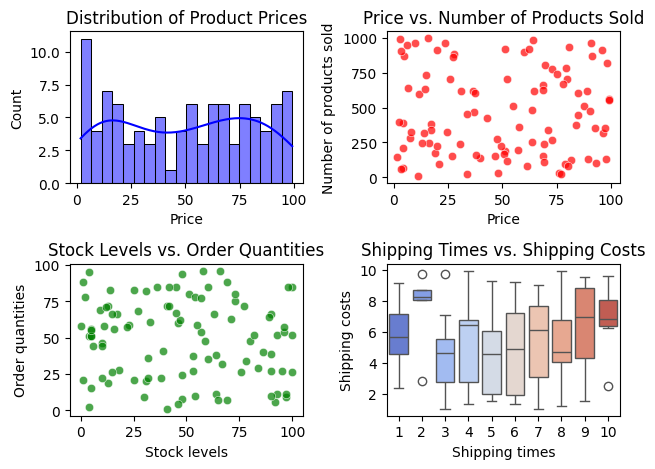

In [17]:
plt.subplot(2, 2, 1) # to divide the plot into 2 rows and 2 columns
sns.histplot(df["Price"], bins=20, kde=True, color="blue")
plt.title("Distribution of Product Prices")
plt.subplot(2, 2, 2)


# رسم Scatter Plot بين السعر وعدد المنتجات المباعة
sns.scatterplot(x=df["Price"], y=df["Number of products sold"], alpha=0.7, color="red")

# إضافة عنوان
plt.title("Price vs. Number of Products Sold")

# تحديد مكان الرسم الثالث
plt.subplot(2, 2, 3)

# رسم Scatter Plot بين مستويات المخزون وكميات الطلبات
sns.scatterplot(x=df["Stock levels"], y=df["Order quantities"], alpha=0.7, color="green") 
#Scatter Plot مفيد عندما تريد دراسة العلاقة بين متغيرين كميّين (رقميين).

# إضافة عنوان
plt.title("Stock Levels vs. Order Quantities")

# تحديد مكان الرسم الرابع
plt.subplot(2, 2, 4)

# رسم Boxplot لمقارنة تكلفة ومدة الشحن
sns.boxplot(x=df["Shipping times"], y=df["Shipping costs"], palette="coolwarm")

# إضافة عنوان
plt.title("Shipping Times vs. Shipping Costs")


plt.tight_layout() # to ensure that the titles and labels fit within the figure area
plt.show()



In [18]:
import numpy as np

# حساب المتوسط والانحراف المعياري لعمود السعر
mean_price = np.mean(df["Price"])
std_price = np.std(df["Price"])

# حساب القيم المئوية لمستويات المخزون لمعرفة هل هناك قيم متطرفة ام لا
percentiles_stock = np.percentile(df["Stock levels"], [25, 50, 75])

print("متوسط السعر:", mean_price)
print("الانحراف المعياري للسعر:", std_price)
print("المئويات لمستويات المخزون:", percentiles_stock)


متوسط السعر: 49.46246134491
الانحراف المعياري للسعر: 31.011960210291697
المئويات لمستويات المخزون: [16.75 47.5  73.  ]


In [19]:
# تصنيف المنتجات حسب السعر
def classify_price(price):
    if price < 20:
        return "Low"
    elif price < 60:
        return "Medium" 
    else:
        return "High"
    
df['Price Category'] = df['Price'].apply(classify_price)
# عرض أول 5 صفوف بعد التصني
df[['Price', 'Price Category']].head()

,Price,Price Category
0,69.808006,High
1,14.843523,Low
2,11.319683,Low
3,61.163343,High
4,4.805496,Low


In [20]:
# استبدال القيم الفارغة في 'Manufacturing costs' بالمتوسط
df["Manufacturing costs"].fillna(df["Manufacturing costs"].mean(), inplace=True)


C:\Users\ICARUS\AppData\Local\Temp\ipykernel_4012\2248057746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Manufacturing costs"].fillna(df["Manufacturing costs"].mean(), inplace=True)


In [21]:
# حساب الربع الأول والثالث
Q1 = np.percentile(df["Stock levels"], 25)
Q3 = np.percentile(df["Stock levels"], 75)

# حساب نطاق القيم بين الربع الأول والثالث
IQR = Q3 - Q1

# تحديد الحدود الدنيا والعليا للقيم المتطرفة
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# استخراج القيم المتطرفة
outliers = df[(df["Stock levels"] < lower_bound) | (df["Stock levels"] > upper_bound)] # |: MEANS OR
print(outliers)

Empty DataFrame
Columns: [Product type, SKU, Price, Availability, Number of products sold, Revenue generated, Customer demographics, Stock levels, Lead times, Order quantities, Shipping times, Shipping carriers, Shipping costs, Supplier name, Location, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Transportation modes, Routes, Costs, Price Category]
Index: []

[0 rows x 25 columns]


In [22]:
# حساب المتوسط والوسيط والانحراف المعياري لمستويات المخزون
mean_stock = np.mean(df["Stock levels"])
median_stock = np.median(df["Stock levels"])
std_stock = np.std(df["Stock levels"])

print(f"Mean: {mean_stock}, Median: {median_stock}, Standard Deviation: {std_stock}")

Mean: 47.77, Median: 47.5, Standard Deviation: 31.21213065460287


In [23]:
def classify_stock(s):
    if s < mean_stock - std_stock:
        return "Low"
    elif s > mean_stock + std_stock:
        return "High"
    else:
        return "Medium"
#s is just an arbitrary variable refers to each cell within stock levels column when calling the function 

df["Stock Category"] = df["Stock levels"].apply(classify_stock)
print(df[["Stock levels", "Stock Category"]].head())


   Stock levels Stock Category
0            58         Medium
1            53         Medium
2             1            Low
3            23         Medium
4             5            Low


In [24]:
df1 = pd.DataFrame({'Product ID': [1, 2, 3], 'Price': [100, 200, 300]})
df2 = pd.DataFrame({'Product ID': [1, 2, 4], 'Stock': [10, 20, 30]})

df_merged = pd.merge(df1, df2, on="Product ID", how="inner")
print(df_merged)
#this an example of how to merge two dataframes in pandas


# df1 = pd.DataFrame({'Product ID': [1, 2, 3], 'Price': [100, 200, 300]})
# df2 = pd.DataFrame({'Product ID': [1, 2, 4], 'Stock': [10, 20, 30]})

# df_merged = pd.concat([df1, df2], axis=1)
# print(df_merged)

   Product ID  Price  Stock
0           1    100     10
1           2    200     20


In [25]:
df = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B'],
    'Product': ['P1', 'P2', 'P3', 'P4'],
    'Price': [100, 200, 300, 400]
})

pivot = df.pivot_table(values="Price", index="Category", aggfunc="mean")
print(pivot)


          Price
Category       
A         150.0
B         350.0


In [26]:
df = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B'],
    'Price': [100, 200, 300, 400],
    'Sales': [5, 10, 15, 20]
})

summary = df.groupby("Category").agg({"Price": "mean", "Sales": "sum"})
print(summary)


          Price  Sales
Category              
A         150.0     15
B         350.0     35


In [27]:
df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df_float = df.applymap(lambda x: float(x))
print(df_float)


     A    B
0  1.0  3.0
1  2.0  4.0


C:\Users\ICARUS\AppData\Local\Temp\ipykernel_4012\301890040.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_float = df.applymap(lambda x: float(x))


In [28]:
df3= pd.DataFrame({'A':[1],'B':[2],'C':[3],'D':[4]})
print(f'df3 is\n{df3}')

df3 is
   A  B  C  D
0  1  2  3  4


In [29]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host="127.0.0.1",
        user="root",
        password="12345"
    )
    
    if conn.is_connected():
        print("✅ MySQL Server is connected!")
    else:
        print("❌ Connection failed!")

except mysql.connector.Error as e:
    print(f"❌ Error: {e}")

finally:
    if 'conn' in locals() and conn.is_connected():
        conn.close()


✅ MySQL Server is connected!


In [30]:
import mysql.connector

# إنشاء الاتصال بقاعدة البيانات
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="12345",
    database="my"
)

# تأكد إن الاتصال نجح
if conn.is_connected():
    print("✅ Connected to MySQL!")
    
    # إنشاء Cursor بعد التأكد من الاتصال
    cursor = conn.cursor()  # يعني بص هنا مسك الكرسور الي بيعرفه دا الكونيكشن الي بين البايثون والسكول بايدك الي جوا السكول هناك وهي فانكشن الكرسور الصفرا دي 

    # تشغيل الاستعلام
    cursor.execute("SELECT * FROM supply_chain_data")

    # جلب البيانات
    results = cursor.fetchall() #fetchall () تعود جميع البيانات it returns all data of the query




    # عرض البيانات
    for row in results:
        print(row)

    # إغلاق الـ Cursor بعد الاستخدام
    cursor.close() # متسيبش الويندو بتاعتك مفتوحة عشان متستهلكش موارد الجهاز عالفاضي  

    # إغلاق الاتصال بعد الانتهاء
    conn.close() # نغلق الاتصال للحفاظ علي الاداء
    print("🔌 Connection closed.")
else:
    print("❌ MySQL Connection failed!")


✅ Connected to MySQL!
('haircare', 'SKU0', 69.80800554, 55, 802, 8661.996792, 'Non-binary', 58, 7, 96, 4, 'Carrier B', 2.956572139, 'Supplier 3', 'Mumbai', 29, 215, 29, 46.27987924, 'Pending', 0.226410361, 'Road', 'Route B', 187.7520755)
('skincare', 'SKU1', 14.84352328, 95, 736, 7460.900065, 'Female', 53, 30, 37, 2, 'Carrier A', 9.716574771, 'Supplier 3', 'Mumbai', 23, 517, 30, 33.61676895, 'Pending', 4.854068026, 'Road', 'Route B', 503.0655791)
('haircare', 'SKU2', 11.31968329, 34, 8, 9577.749626, 'Unknown', 1, 10, 88, 2, 'Carrier B', 8.054479262, 'Supplier 1', 'Mumbai', 12, 971, 27, 30.68801935, 'Pending', 4.580592619, 'Air', 'Route C', 141.9202818)
('skincare', 'SKU3', 61.16334302, 68, 83, 7766.836426, 'Non-binary', 23, 13, 59, 6, 'Carrier C', 1.729568564, 'Supplier 5', 'Kolkata', 24, 937, 18, 35.6247414, 'Fail', 4.746648621, 'Rail', 'Route A', 254.7761592)
('skincare', 'SKU4', 4.805496036, 26, 871, 2686.505152, 'Non-binary', 5, 3, 56, 8, 'Carrier A', 3.890547916, 'Supplier 1', 'De

In [31]:
# إنشاء الاتصال
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="12345",
    database="my"
)

# إنشاء كائن cursor
cursor = conn.cursor()

# تنفيذ الاستعلام
query = """
SELECT * 
FROM supply_chain_data s
WHERE Price = (SELECT MAX(Price) FROM supply_chain_data WHERE `Product type` = s.`Product type`);
"""
cursor.execute(query)

# جلب البيانات وتحويلها إلى DataFrame
columns2 = [i[0] for i in cursor.description]  # استخراج أسماء الأعمدة
data = cursor.fetchall()
df = pd.DataFrame(data, columns=columns2)

# إغلاق الاتصال
cursor.close()
conn.close()

# عرض أول 5 صفوف للتأكد من البيانات
print(df.head())


  Product type    SKU      Price  Availability  Number of products sold  \
0     skincare  SKU14  99.171329            26                      562   
1     haircare  SKU26  97.446947             9                      353   
2    cosmetics  SKU89  97.760086            10                      134   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8653.570926            Non-binary            54          29   
1        3716.493326                  Male            59          16   
2        5924.682567               Unknown            90           1   

   Order quantities  ...   Location Lead time  Production volumes  \
0                78  ...    Kolkata        25                 558   
1                48  ...  Bangalore        26                 171   
2                27  ...    Kolkata        23                 370   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      14            5.791437             Pendin

C:\Users\ICARUS\AppData\Local\Temp\ipykernel_4012\3288747313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product type", y="Price", data=df, palette="viridis")
C:\Users\ICARUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


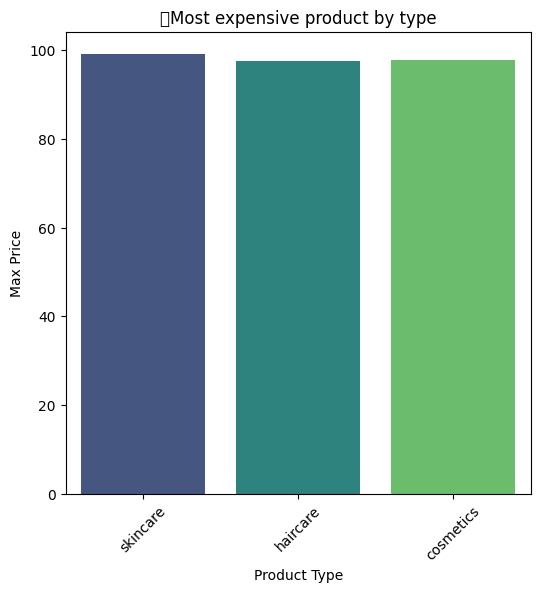

In [32]:
plt.figure(figsize=(6, 6))
sns.barplot(x="Product type", y="Price", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Product Type")
plt.ylabel("Max Price")
plt.title("🔝Most expensive product by type")
plt.show()

C:\Users\ICARUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


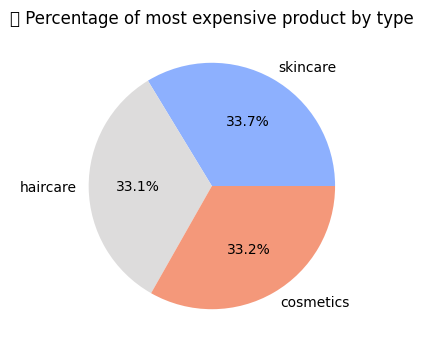

In [33]:
plt.figure(figsize=(4, 4))
plt.pie(df["Price"], labels=df["Product type"], autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(df)))
plt.title("💰 Percentage of most expensive product by type")
plt.show()

In [34]:
import numpy as np

# تحويل عمود الأسعار إلى مصفوفة NumPy
prices = df["Price"].to_numpy()

# تحويل عمود المخزون إلى مصفوفة NumPy
stock_levels = df["Stock levels"].to_numpy()

# عرض شكل المصفوفات
prices.shape, stock_levels.shape


((3,), (3,))

In [35]:
# حساب متوسط السعر
mean_price = np.mean(prices)

# حساب الانحراف المعياري للأسعار
std_price = np.std(prices)

# إيجاد الحد الأدنى والحد الأقصى
min_price = np.min(prices)
max_price = np.max(prices)

# طباعة النتائج
mean_price, std_price, min_price, max_price


(np.float64(98.12612028000001),
 np.float64(0.7500486157256228),
 np.float64(97.44694662),
 np.float64(99.17132864))

In [36]:
# استخراج الأسعار الأكبر من المتوسط
high_prices = np.where(prices > mean_price, prices, np.nan)

# عرض بعض النتائج
high_prices[:10]  # أول 10 أسعار


array([99.17132864,         nan,         nan])

In [37]:

percentiles = np.percentile(prices, [25, 50, 75])
percentiles


array([97.6035161 , 97.76008558, 98.46570711])

In [41]:
failure_rate = df.groupby('Shipping carriers')['Inspection results'].apply(lambda x: (x == 'Fail').sum() * 100 / len(x))

failure_rate = failure_rate.sort_values(ascending=False)

failure_rate

Shipping carriers
Carrier B    0.0
Name: Inspection results, dtype: float64

In [42]:
df['Inspection results'].unique()

array(['Pending', 'Pass'], dtype=object)